In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from bodge import *

In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from bodge import *

In [10]:
DIAG: bool  # Diagonal [110] vs. straight [100] junctions

L_SC: int  # Superconductor length
L_NM: int  # Normal-metal length
L_AM: int  # Altermagnet length

L_X: int  # Total length along the junction direction [X]
L_Y: int  # Total length in the transverse direction [Y]
L_Z: int = 1  # We consider only 2D lattices here

In [11]:
DIAG: bool  # Diagonal [110] vs. straight [100] junctions

L_SC: int  # Superconductor length
L_NM: int  # Normal-metal length
L_AM: int  # Altermagnet length

L_X: int  # Total length along the junction direction [X]
L_Y: int  # Total length in the transverse direction [Y]
L_Z: int = 1  # We consider only 2D lattices here

In [12]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return (i[0] + (L_X - i[1]))//2

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return (i[0] - (L_X - i[1]))//2

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

In [13]:
# These functions are used to check whether a specific lattice site i
# corresponds to a specific material. Nice for Hamiltonian construction.
def SC1(i):
    """Left superconductor."""
    return x(i) < L_SC
    
def SC2(i):
    """Right superconductor."""
    return x(i) >= L_X - L_SC

def NM1(i):
    """Left normal spacer."""
    return x(i) < L_SC + L_NM and not SC1(i)

def NM2(i):
    """Right normal spacer."""
    return x(i) >= L_X - L_SC - L_NM and not SC2(i)

def OBS(i):
    """Current observation region."""
    return x(i) == L_SC + L_NM//2

def AM(i):
    """Altermagnetic interlayer."""
    return not SC1(i) and not SC2(i) and not NM1(i) and not NM2(i)

In [14]:
# These routines are used to construct and visualize the relevant lattice types.
lattice: CubicLattice
def create_lattice():
    if DIAG:
        return CubicLattice((L_X + L_Y, L_X + L_Y, 1))
    else:
        return CubicLattice((L_X, L_Y, 1))

def visualize():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    marker="."

    for i in lattice.sites():
        if OBS(i):
            ax.scatter(x=i[0], y=i[1], color='#ff0000', marker=marker)
        elif SC1(i) or SC2(i):
            ax.scatter(x=i[0], y=i[1], color='#ff7f00', marker=marker)
        elif NM1(i) or NM2(i):
            ax.scatter(x=i[0], y=i[1], color='k', marker=marker)
        elif AM(i):
            ax.scatter(x=i[0], y=i[1], color='#984ea3', marker=marker)
        else:
            ax.scatter(x=i[0], y=i[1], color='#eeeeee', marker=marker)
    plt.show()

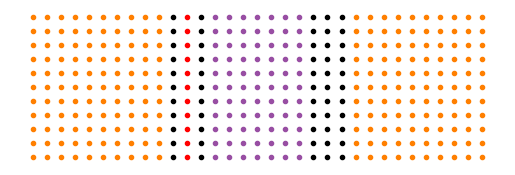

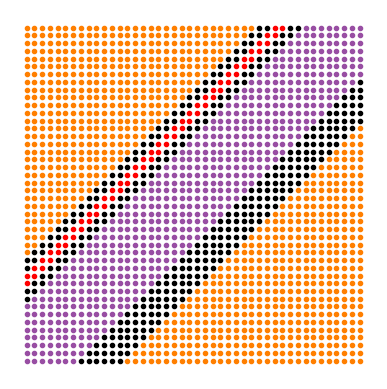

In [15]:
L_SC = 10
L_NM = 3
L_AM = 7

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

In [16]:
# These routines are used to construct and visualize the relevant lattice types.
lattice: CubicLattice
def create_lattice():
    if DIAG:
        return CubicLattice((L_X + L_Y, L_X + L_Y, 1))
    else:
        return CubicLattice((L_X, L_Y, 1))

def visualize():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    marker="."

    for i in lattice.sites():
        if not inside(i):
            ax.scatter(x=i[0], y=i[1], color='#eeeeee', marker=marker)
        elif OBS(i):
            ax.scatter(x=i[0], y=i[1], color='#ff0000', marker=marker)
        elif SC1(i) or SC2(i):
            ax.scatter(x=i[0], y=i[1], color='#ff7f00', marker=marker)
        elif NM1(i) or NM2(i):
            ax.scatter(x=i[0], y=i[1], color='k', marker=marker)
        elif AM(i):
            ax.scatter(x=i[0], y=i[1], color='#984ea3', marker=marker)
    plt.show()

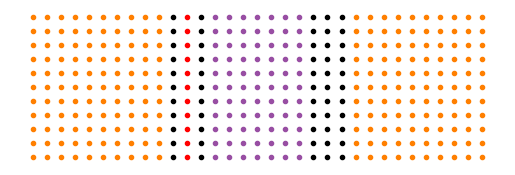

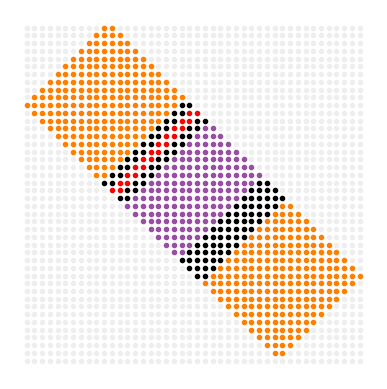

In [17]:
L_SC = 10
L_NM = 3
L_AM = 7

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

In [18]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return np.floor((i[0] + (L_X - i[1]))//2.83)

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return np.floor((i[0] - (L_X - i[1]))/2.83)

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

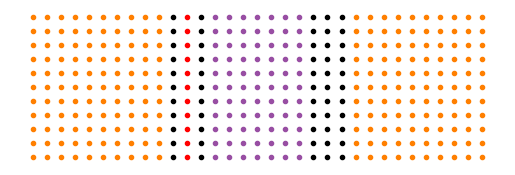

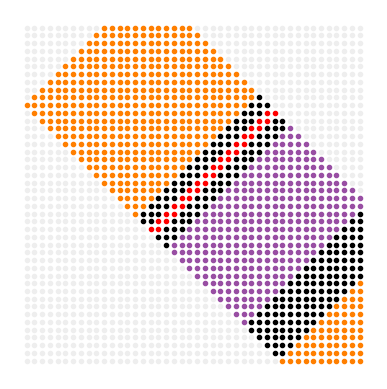

In [19]:
L_SC = 10
L_NM = 3
L_AM = 7

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

In [20]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return np.floor((i[0] + (L_X - i[1]))/np.sqrt(2))

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return np.floor((i[0] - (L_X - i[1]))/np.sqrt(2))

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

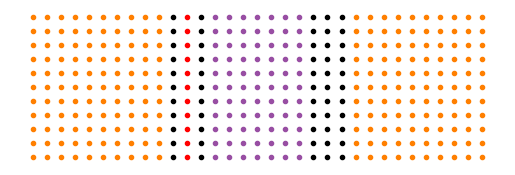

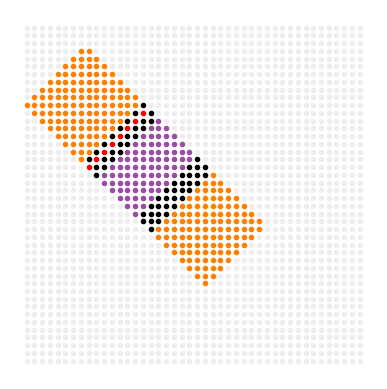

In [21]:
L_SC = 10
L_NM = 3
L_AM = 7

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

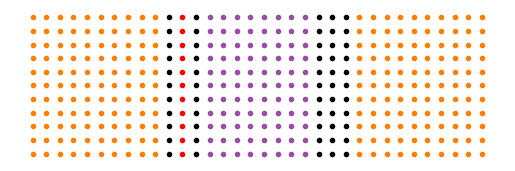

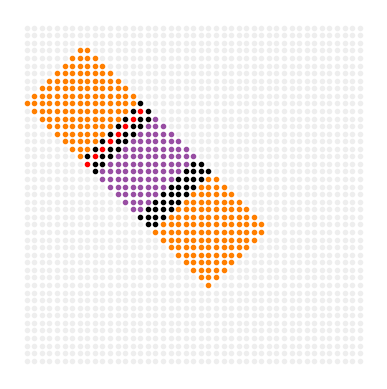

In [22]:
L_SC = 10
L_NM = 3
L_AM = 8

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

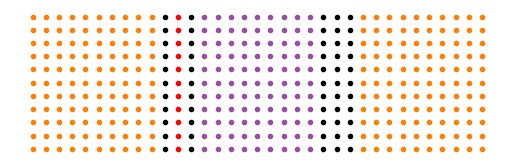

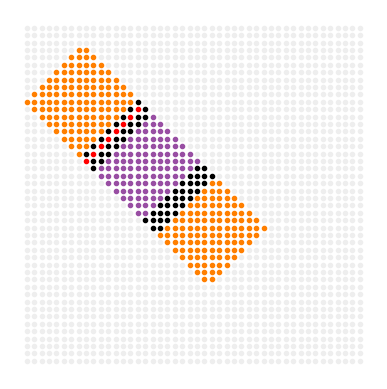

In [23]:
L_SC = 10
L_NM = 3
L_AM = 9

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

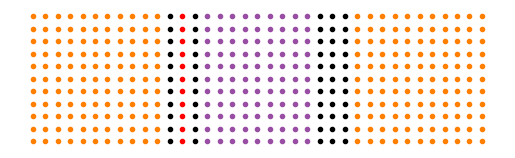

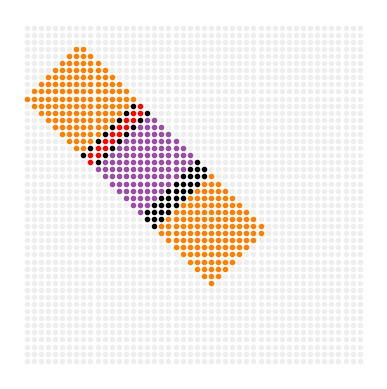

In [24]:
L_SC = 11
L_NM = 3
L_AM = 9

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

In [25]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return np.round((i[0] + (L_X - i[1]))/np.sqrt(2))

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return np.round((i[0] - (L_X - i[1]))/np.sqrt(2))

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

In [26]:
# These routines are used to construct and visualize the relevant lattice types.
lattice: CubicLattice
def create_lattice():
    if DIAG:
        return CubicLattice((L_X + L_Y, L_X + L_Y, 1))
    else:
        return CubicLattice((L_X, L_Y, 1))

def visualize():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    marker="."

    for i in lattice.sites():
        if not inside(i):
            ax.scatter(x=i[0], y=i[1], color='#eeeeee', marker=marker)
        elif OBS(i):
            ax.scatter(x=i[0], y=i[1], color='#ff0000', marker=marker)
        elif SC1(i) or SC2(i):
            ax.scatter(x=i[0], y=i[1], color='#ff7f00', marker=marker)
        elif NM1(i) or NM2(i):
            ax.scatter(x=i[0], y=i[1], color='k', marker=marker)
        elif AM(i):
            ax.scatter(x=i[0], y=i[1], color='#984ea3', marker=marker)
    plt.show()

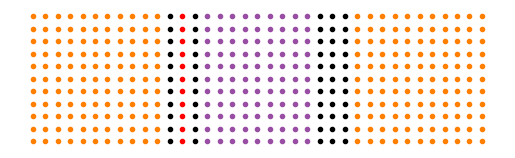

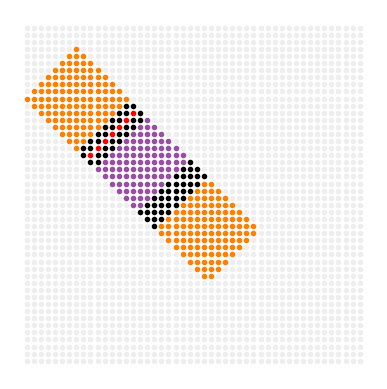

In [27]:
L_SC = 11
L_NM = 3
L_AM = 9

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

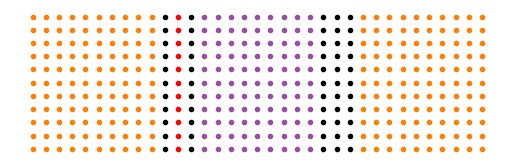

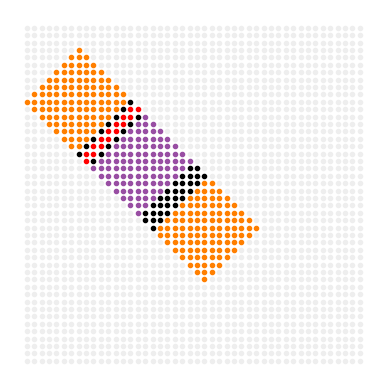

In [28]:
L_SC = 10
L_NM = 3
L_AM = 9

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

In [29]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return ((i[0] + (L_X - i[1]))//2

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return ((i[0] - (L_X - i[1]))//2

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

SyntaxError: invalid syntax (<ipython-input-29-fe2092d6e1a6>, line 11)

In [30]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return (i[0] + (L_X - i[1]))//2

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return (i[0] - (L_X - i[1]))//2

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

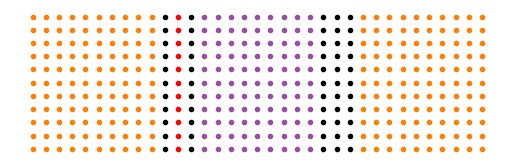

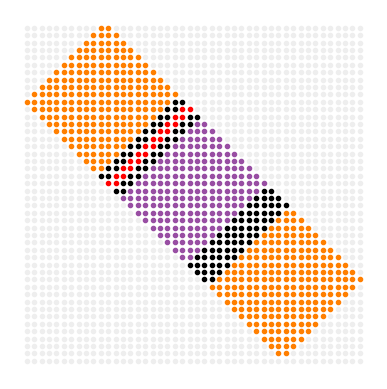

In [31]:
L_SC = 10
L_NM = 3
L_AM = 9

L_X = 2 * L_SC + 2 * L_NM + L_AM
L_Y = 11

DIAG = False
lattice = create_lattice()
visualize()

DIAG = True
lattice = create_lattice()
visualize()

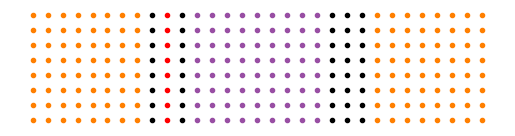

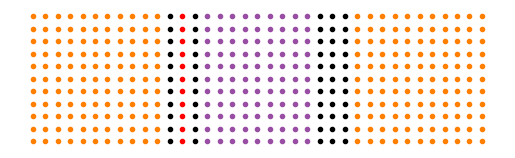

In [32]:
L_NM = 3
L_AM = 9

DIAG = False

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

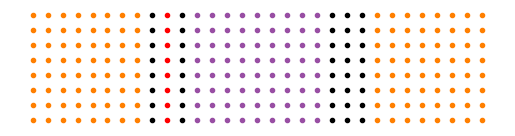

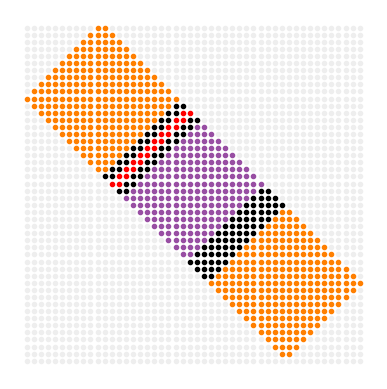

In [33]:
L_NM = 3
L_AM = 9

DIAG = False

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

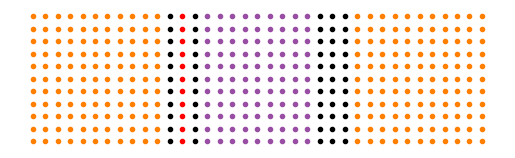

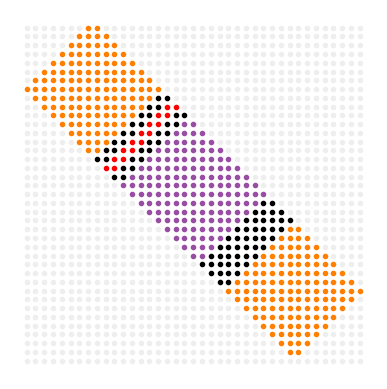

In [34]:
L_NM = 3
L_AM = 9

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

In [35]:
# These routines are used to construct and visualize the relevant lattice types.
lattice: CubicLattice
def create_lattice():
    if DIAG:
        return CubicLattice((L_X + L_Y, L_X + L_Y, 1))
    else:
        return CubicLattice((L_X, L_Y, 1))

def visualize():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    marker="."

    for i in lattice.sites():
        if not inside(i):
            ax.scatter(x=i[0], y=i[1], color='#eeeeee', marker=marker)
        elif OBS(i):
            ax.scatter(x=i[0], y=i[1], color='#ff0000', marker=marker)
        elif SC1(i) or SC2(i):
            ax.scatter(x=i[0], y=i[1], color='#ff7f00', marker=marker)
        elif NM1(i) or NM2(i):
            ax.scatter(x=i[0], y=i[1], color='k', marker=marker)
        elif AM(i):
            ax.scatter(x=i[0], y=i[1], color='#984ea3', marker=marker)
    plt.show()

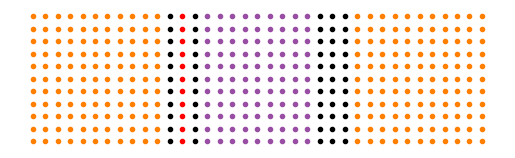

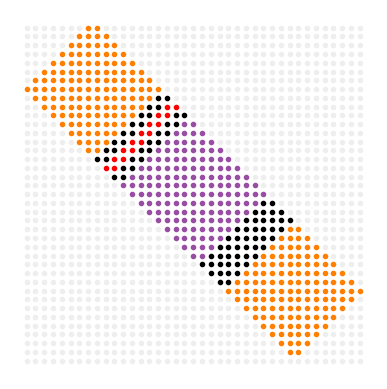

In [36]:
L_NM = 3
L_AM = 9

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

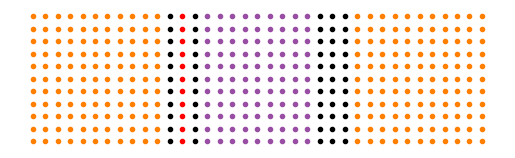

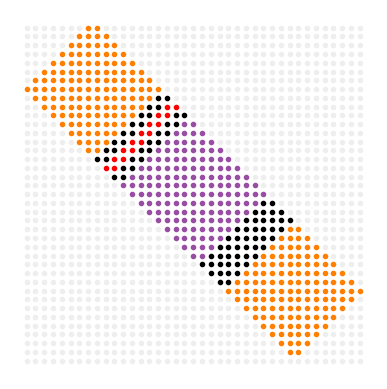

In [37]:
L_NM = 3
L_AM = 9

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

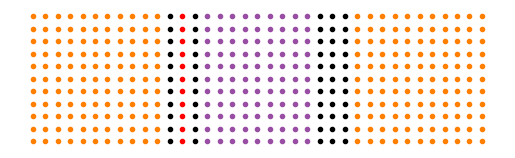

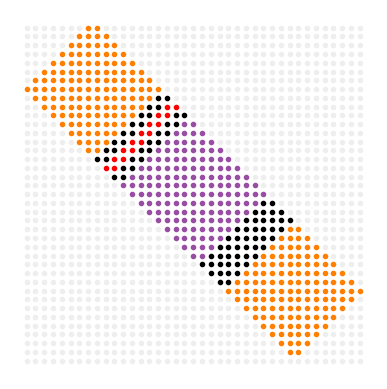

In [38]:
L_NM = 3
L_AM = 9

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

In [39]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(0.01)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

In [40]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(0.01)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

In [41]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            H[i, i] = -μ * σ0
            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

 10%|█         | 1/10 [00:03<00:31,  3.49s/it]

J(N = 200)/t = 0.07254215379201898


 20%|██        | 2/10 [00:10<00:43,  5.38s/it]

J(N = 400)/t = 0.3528221262386024


 30%|███       | 3/10 [00:20<00:52,  7.57s/it]

J(N = 600)/t = 0.5171570457972142


 40%|████      | 4/10 [00:33<00:59,  9.87s/it]

J(N = 800)/t = 0.6019317578886488


 50%|█████     | 5/10 [00:50<01:01, 12.34s/it]

J(N = 1000)/t = 0.6465837439839618


 60%|██████    | 6/10 [01:10<00:59, 14.96s/it]

J(N = 1200)/t = 0.6718795531876656


 70%|███████   | 7/10 [01:33<00:53, 17.73s/it]

J(N = 1400)/t = 0.6873952029108981


 80%|████████  | 8/10 [02:01<00:41, 20.73s/it]

J(N = 1600)/t = 0.6975549654777704


 90%|█████████ | 9/10 [02:32<00:23, 23.94s/it]

J(N = 1800)/t = 0.7045560658478343


100%|██████████| 10/10 [03:06<00:00, 18.66s/it]

J(N = 2000)/t = 0.7095800005111764


Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

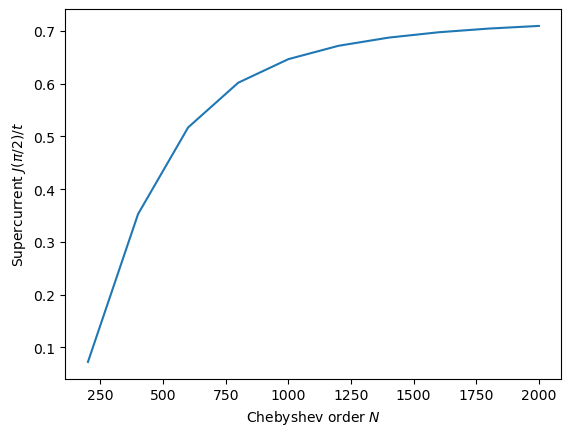

In [42]:
plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [43]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:03<00:31,  3.55s/it]

J(N = 200)/t = 0.06296471830179307


 20%|██        | 2/10 [00:10<00:43,  5.46s/it]

J(N = 400)/t = 0.2905660779569674


 30%|███       | 3/10 [00:20<00:53,  7.64s/it]

J(N = 600)/t = 0.41027435669716855


 40%|████      | 4/10 [00:34<00:59,  9.92s/it]

J(N = 800)/t = 0.46919040922945426


 50%|█████     | 5/10 [00:50<01:01, 12.37s/it]

J(N = 1000)/t = 0.5012378264793093


 60%|██████    | 6/10 [01:10<00:59, 14.98s/it]

J(N = 1200)/t = 0.5205148874207505


 70%|███████   | 7/10 [01:34<00:53, 17.98s/it]

J(N = 1400)/t = 0.5329496559974417


 70%|███████   | 7/10 [01:37<00:41, 13.94s/it]


KeyboardInterrupt: 

In [ ]:
L_NM = 3
L_AM = 32

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

: 

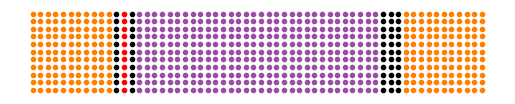

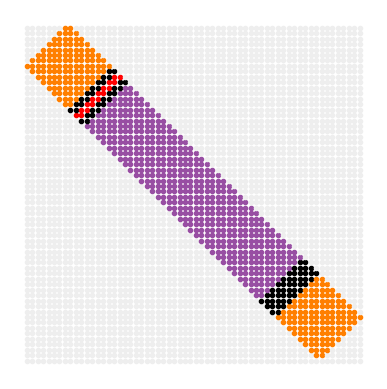

In [44]:
L_NM = 3
L_AM = 32

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

In [45]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(0.01)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

 10%|█         | 1/10 [00:10<01:37, 10.84s/it]

J(N = 200)/t = -7.44206702503482e-08


 20%|██        | 2/10 [00:32<02:18, 17.28s/it]

J(N = 400)/t = -0.005631914955337332


 30%|███       | 3/10 [01:05<02:50, 24.39s/it]

J(N = 600)/t = -0.024354867050729256


 40%|████      | 4/10 [01:49<03:12, 32.15s/it]

J(N = 800)/t = -0.043673300380573404


 50%|█████     | 5/10 [02:44<03:22, 40.55s/it]

J(N = 1000)/t = -0.05828781647729406


 60%|██████    | 6/10 [03:52<03:18, 49.74s/it]

J(N = 1200)/t = -0.06846159677123004


 70%|███████   | 7/10 [05:10<02:56, 58.94s/it]

J(N = 1400)/t = -0.07556256701255834


 80%|████████  | 8/10 [06:41<02:18, 69.05s/it]

J(N = 1600)/t = -0.08064005018114676


 90%|█████████ | 9/10 [08:22<01:19, 79.09s/it]

J(N = 1800)/t = -0.08436854390658437


100%|██████████| 10/10 [10:15<00:00, 61.58s/it]

J(N = 2000)/t = -0.08717511242706084


Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

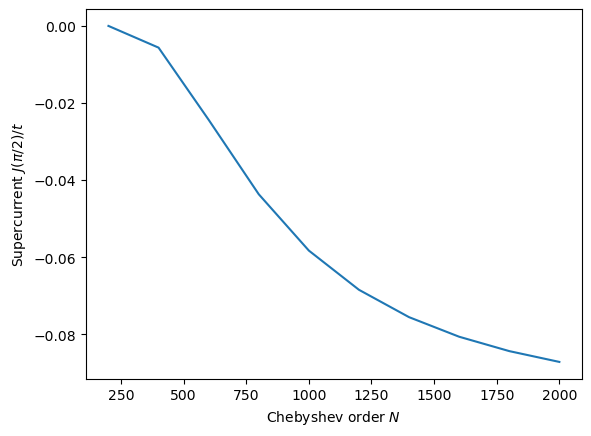

In [46]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [47]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:38, 10.90s/it]

J(N = 200)/t = -7.44206702503482e-08


 10%|█         | 1/10 [00:21<03:14, 21.60s/it]


KeyboardInterrupt: 

In [ ]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

: 

In [ ]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

: 

 10%|█         | 1/10 [00:10<01:38, 10.96s/it]

J(N = 200)/t = -7.44206702503482e-08


 20%|██        | 2/10 [00:32<02:19, 17.48s/it]

J(N = 400)/t = -0.005631914955337332


 30%|███       | 3/10 [01:17<03:28, 29.83s/it]

J(N = 800)/t = -0.043673300380573404


 40%|████      | 4/10 [02:47<05:22, 53.70s/it]

J(N = 1600)/t = -0.08064005018114676


 50%|█████     | 5/10 [04:39<06:13, 74.70s/it]

J(N = 2000)/t = -0.08717511242706084


 60%|██████    | 6/10 [06:53<06:19, 94.82s/it]

J(N = 2400)/t = -0.09102929177709948


 70%|███████   | 7/10 [09:30<05:45, 115.18s/it]

J(N = 2800)/t = -0.09347700339439655


 80%|████████  | 8/10 [12:29<04:30, 135.48s/it]

J(N = 3200)/t = -0.09512307501630465


 90%|█████████ | 9/10 [15:52<02:36, 156.52s/it]

J(N = 3600)/t = -0.0962810146726904


100%|██████████| 10/10 [19:37<00:00, 117.72s/it]

J(N = 4000)/t = -0.09712553647313103


Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

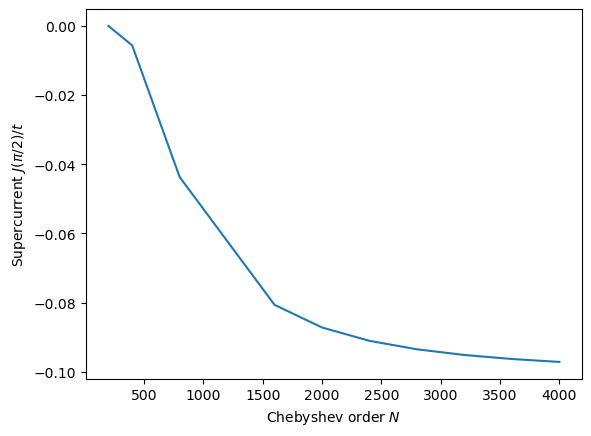

In [48]:
t = 1.0
Δ0 = 0.1 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [49]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:38, 10.94s/it]

J(N = 200)/t = 4.88611465687948e-07


 20%|██        | 2/10 [00:32<02:19, 17.39s/it]

J(N = 400)/t = 0.0026169164606762566


 30%|███       | 3/10 [01:18<03:30, 30.09s/it]

J(N = 800)/t = 0.013045434337397991


 40%|████      | 4/10 [02:47<05:21, 53.59s/it]

J(N = 1600)/t = 0.020944312324788737


 50%|█████     | 5/10 [04:39<06:13, 74.62s/it]

J(N = 2000)/t = 0.022240809990937808


 60%|██████    | 6/10 [06:53<06:18, 94.66s/it]

J(N = 2400)/t = 0.022991199345072905


 70%|███████   | 7/10 [09:29<05:44, 114.80s/it]

J(N = 2800)/t = 0.0234620593959981


 80%|████████  | 8/10 [12:27<04:30, 135.02s/it]

J(N = 3200)/t = 0.02377611639894776


 80%|████████  | 8/10 [12:41<03:10, 95.13s/it] 


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (9,) and (8,)

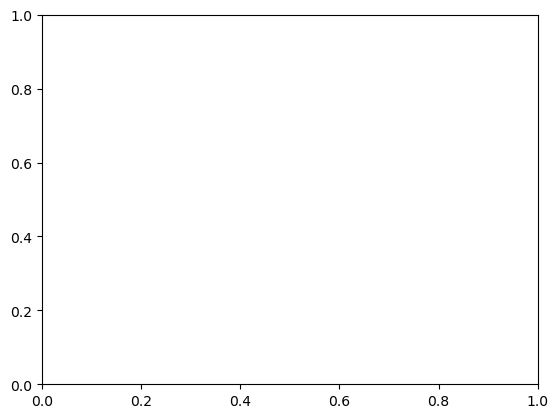

In [50]:
plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [51]:
Ns = Ns[:-1]

Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

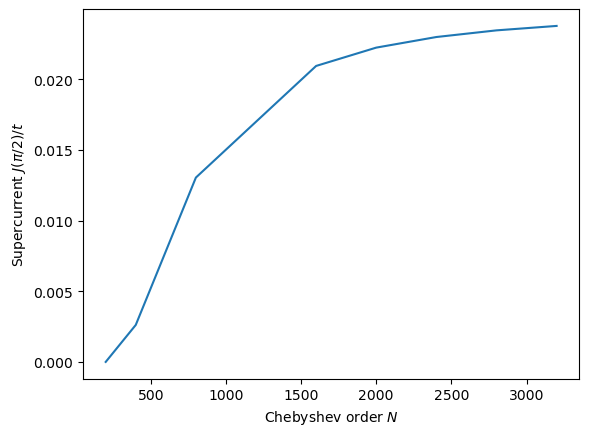

In [52]:
plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [53]:
t = 1.0
Δ0 = 0.01 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:38, 11.00s/it]

J(N = 200)/t = 7.096478033588245e-08


kpm:   0%|          | 0/223 [00:00<?, ?blk/s]

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from bodge import *


Bad key "text.kerning_factor" on line 4 in
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
DIAG: bool  # Diagonal [110] vs. straight [100] junctions

L_SC: int  # Superconductor length
L_NM: int  # Normal-metal length
L_AM: int  # Altermagnet length

L_X: int  # Total length along the junction direction [X]
L_Y: int  # Total length in the transverse direction [Y]
L_Z: int = 1  # We consider only 2D lattices here

In [3]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return (i[0] + (L_X - i[1]))//2

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return (i[0] - (L_X - i[1]))//2

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

In [4]:
# These functions are used to check whether a specific lattice site i
# corresponds to a specific material. Nice for Hamiltonian construction.
def SC1(i):
    """Left superconductor."""
    return x(i) < L_SC
    
def SC2(i):
    """Right superconductor."""
    return x(i) >= L_X - L_SC

def NM1(i):
    """Left normal spacer."""
    return x(i) < L_SC + L_NM and not SC1(i)

def NM2(i):
    """Right normal spacer."""
    return x(i) >= L_X - L_SC - L_NM and not SC2(i)

def OBS(i):
    """Current observation region."""
    return x(i) == L_SC + L_NM//2

def AM(i):
    """Altermagnetic interlayer."""
    return not SC1(i) and not SC2(i) and not NM1(i) and not NM2(i)

In [5]:
# These routines are used to construct and visualize the relevant lattice types.
lattice: CubicLattice
def create_lattice():
    if DIAG:
        return CubicLattice((L_X + L_Y, L_X + L_Y, 1))
    else:
        return CubicLattice((L_X, L_Y, 1))

def visualize():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    marker="."

    for i in lattice.sites():
        if not inside(i):
            ax.scatter(x=i[0], y=i[1], color='#eeeeee', marker=marker)
        elif OBS(i):
            ax.scatter(x=i[0], y=i[1], color='#ff0000', marker=marker)
        elif SC1(i) or SC2(i):
            ax.scatter(x=i[0], y=i[1], color='#ff7f00', marker=marker)
        elif NM1(i) or NM2(i):
            ax.scatter(x=i[0], y=i[1], color='k', marker=marker)
        elif AM(i):
            ax.scatter(x=i[0], y=i[1], color='#984ea3', marker=marker)
    plt.show()

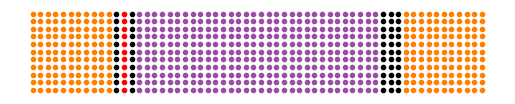

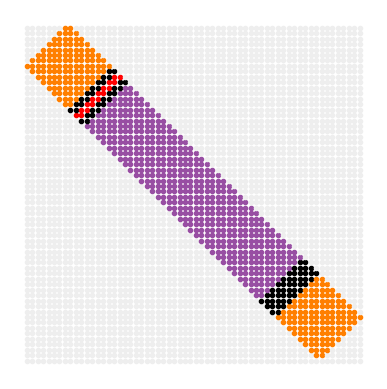

In [6]:
L_NM = 3
L_AM = 32

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

In [7]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(1e-4)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

In [8]:
t = 1.0
Δ0 = 0.01 * t
μ = -0.5 * t
δφ = π/2

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:32, 10.32s/it]

J(N = 200)/t = 7.978505766018707e-08


 20%|██        | 2/10 [00:31<02:14, 16.86s/it]

J(N = 400)/t = 0.0005701384115057224


 30%|███       | 3/10 [01:15<03:23, 29.07s/it]

J(N = 800)/t = 0.0037454310221202223


 40%|████      | 4/10 [02:43<05:14, 52.37s/it]

J(N = 1600)/t = 0.007761909663704662


 50%|█████     | 5/10 [04:33<06:06, 73.27s/it]

J(N = 2000)/t = 0.008893293628838244


 60%|██████    | 6/10 [06:47<06:14, 93.71s/it]

J(N = 2400)/t = 0.009659451793045516


 70%|███████   | 7/10 [09:23<05:42, 114.18s/it]

J(N = 2800)/t = 0.010237449071469359


 70%|███████   | 7/10 [11:05<04:45, 95.08s/it] 


KeyboardInterrupt: 

In [ ]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(1e-3)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

: 

In [ ]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(1e-3)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

: 

In [9]:
def current(system, N=1000):
    F = FermiMatrix(system, N)(1e-3)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

In [10]:
def current(system, N=1000, T=1e-3):
    F = FermiMatrix(system, N)(T)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

In [11]:
t = 1.0
Δ0 = 0.01 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * t

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:33, 10.37s/it]

J(N = 200)/t = 4.490035997147269e-12


 20%|██        | 2/10 [00:31<02:15, 16.92s/it]

J(N = 400)/t = 2.963463437119901e-09


 30%|███       | 3/10 [01:15<03:24, 29.27s/it]

J(N = 800)/t = 7.565411857550558e-09


 30%|███       | 3/10 [02:03<04:48, 41.17s/it]


KeyboardInterrupt: 

In [12]:
t = 1.0
Δ0 = 0.01 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:34, 10.52s/it]

J(N = 200)/t = 7.978505766018707e-08


 20%|██        | 2/10 [00:32<02:15, 16.98s/it]

J(N = 400)/t = 0.0005701384115056804


 30%|███       | 3/10 [01:15<03:24, 29.24s/it]

J(N = 800)/t = 0.003745430168225234


 40%|████      | 4/10 [02:44<05:16, 52.75s/it]

J(N = 1600)/t = 0.007759672139450196


 50%|█████     | 5/10 [04:36<06:09, 73.97s/it]

J(N = 2000)/t = 0.00888386793439932


 60%|██████    | 6/10 [06:49<06:16, 94.25s/it]

J(N = 2400)/t = 0.00963673571614476


 70%|███████   | 7/10 [09:25<05:42, 114.23s/it]

J(N = 2800)/t = 0.010195445275724264


 80%|████████  | 8/10 [12:23<04:29, 134.63s/it]

J(N = 3200)/t = 0.010624441331739053


 80%|████████  | 8/10 [12:46<03:11, 95.81s/it] 


KeyboardInterrupt: 

In [13]:
Ns = Ns[:-1]

Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

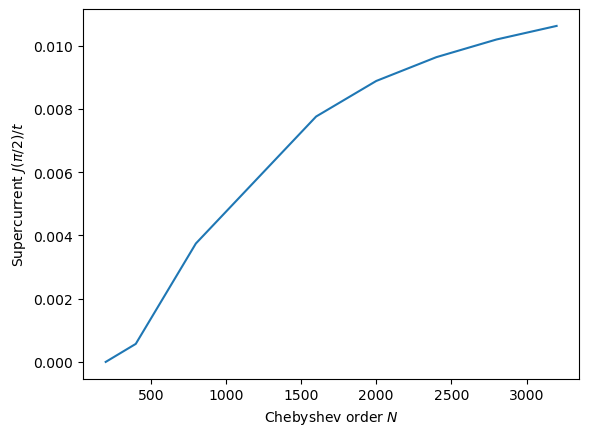

In [14]:
plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 10%|█         | 1/10 [00:10<01:34, 10.46s/it]

J(N = 200)/t = 5.483616862425857e-07


 20%|██        | 2/10 [00:32<02:17, 17.19s/it]

J(N = 400)/t = 0.00432675778887823


 30%|███       | 3/10 [01:17<03:28, 29.80s/it]

J(N = 800)/t = 0.02578598502967621


 40%|████      | 4/10 [02:45<05:18, 53.01s/it]

J(N = 1600)/t = 0.0414618661202408


 50%|█████     | 5/10 [04:36<06:09, 73.99s/it]

J(N = 2000)/t = 0.044040433949824376


 60%|██████    | 6/10 [06:50<06:16, 94.23s/it]

J(N = 2400)/t = 0.04576119403472087


 70%|███████   | 7/10 [09:26<05:42, 114.31s/it]

J(N = 2800)/t = 0.046851770042705035


 80%|████████  | 8/10 [12:24<04:29, 134.84s/it]

J(N = 3200)/t = 0.047541373528135505


 90%|█████████ | 9/10 [15:45<02:35, 155.38s/it]

J(N = 3600)/t = 0.04795160088185865


100%|██████████| 10/10 [19:28<00:00, 116.85s/it]

J(N = 4000)/t = 0.048182103481626826


Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

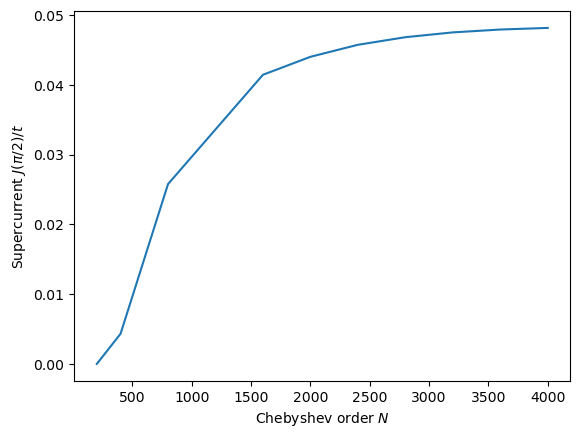

In [15]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [16]:
for (N, J) in zip(Ns, Js):

IndentationError: expected an indented block (<ipython-input-16-a386407bc077>, line 1)

In [17]:
for (N, J) in zip(Ns, Js):
    print(N, J/Js[-1])

200 1.1381024210611545e-05
400 0.08980010161922762
800 0.5351776524142231
1600 0.8605242013987904
2000 0.9140413300265775
2400 0.9497550071090376
2800 0.9723894694753399
3200 0.9867019098961578
3600 0.9952160121059043
4000 1.0


 10%|█         | 1/10 [00:10<01:35, 10.57s/it]

J(N = 200)/t = 6.18846728299829e-07


 20%|██        | 2/10 [00:32<02:16, 17.12s/it]

J(N = 400)/t = 0.005048379995251505


 30%|███       | 3/10 [01:16<03:25, 29.33s/it]

J(N = 800)/t = 0.032831703700472746


 40%|████      | 4/10 [02:44<05:16, 52.72s/it]

J(N = 1600)/t = 0.06386303050858086


 50%|█████     | 5/10 [04:35<06:09, 73.80s/it]

J(N = 2000)/t = 0.07110102348824543


 60%|██████    | 6/10 [06:49<06:16, 94.13s/it]

J(N = 2400)/t = 0.07572977677126128


 70%|███████   | 7/10 [09:26<05:44, 114.70s/it]

J(N = 2800)/t = 0.07906115531263491


 80%|████████  | 8/10 [12:25<04:30, 135.14s/it]

J(N = 3200)/t = 0.08152916963011722


 90%|█████████ | 9/10 [15:46<02:35, 155.67s/it]

J(N = 3600)/t = 0.08337590693619686


100%|██████████| 10/10 [19:30<00:00, 117.06s/it]

J(N = 4000)/t = 0.08477996906258956


Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

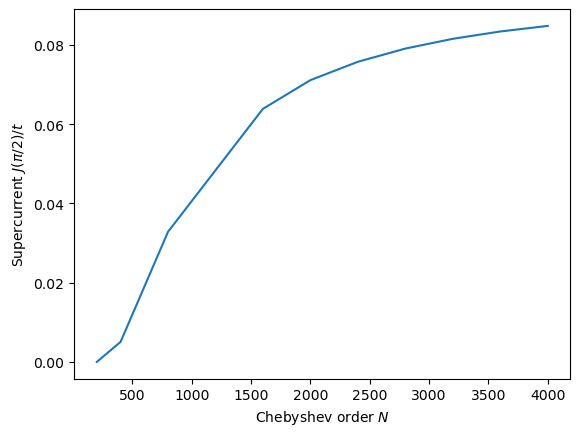

In [18]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

# m = Δ0/2
m = 0

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [19]:
for (N, J) in zip(Ns, Js):
    print(N, J/Js[-1])

200 7.29944508287046e-06
400 0.05954684875532915
800 0.38725779289013956
1600 0.7532797099917955
2000 0.8386535672801966
2400 0.8932508186615769
2800 0.9325452248545564
3200 0.9616560436572889
3600 0.9834387516070436
4000 1.0


In [20]:


for (N, J) in zip(Ns, Js):
    print(N, J/Js[-1])

200 7.29944508287046e-06
400 0.05954684875532915
800 0.38725779289013956
1600 0.7532797099917955
2000 0.8386535672801966
2400 0.8932508186615769
2800 0.9325452248545564
3200 0.9616560436572889
3600 0.9834387516070436
4000 1.0


In [21]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

m = Δ0/2
# m = 0

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 8000]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

  9%|▉         | 1/11 [00:10<01:44, 10.41s/it]

J(N = 200)/t = 5.483616862425857e-07


  9%|▉         | 1/11 [00:14<02:20, 14.02s/it]


KeyboardInterrupt: 

  7%|▋         | 1/14 [00:10<02:14, 10.38s/it]

J(N = 200)/t = 5.483616862425857e-07


 14%|█▍        | 2/14 [00:32<03:24, 17.01s/it]

J(N = 400)/t = 0.00432675778887823


 21%|██▏       | 3/14 [01:17<05:27, 29.78s/it]

J(N = 800)/t = 0.02578598502967621


 29%|██▊       | 4/14 [02:46<08:53, 53.35s/it]

J(N = 1600)/t = 0.0414618661202408


 36%|███▌      | 5/14 [04:38<11:10, 74.53s/it]

J(N = 2000)/t = 0.044040433949824376


 43%|████▎     | 6/14 [06:52<12:36, 94.59s/it]

J(N = 2400)/t = 0.04576119403472087


 50%|█████     | 7/14 [09:11<12:44, 109.15s/it]

J(N = 2500)/t = 0.04608100538220209


 57%|█████▋    | 8/14 [11:35<12:02, 120.37s/it]

J(N = 2600)/t = 0.04636684779694156


 64%|██████▍   | 9/14 [14:11<10:57, 131.43s/it]

J(N = 2800)/t = 0.046851770042705035


 71%|███████▏  | 10/14 [16:58<09:30, 142.59s/it]

J(N = 3000)/t = 0.0472386588168009


 79%|███████▊  | 11/14 [19:56<07:40, 153.40s/it]

J(N = 3200)/t = 0.047541373528135505


 86%|████████▌ | 12/14 [23:17<05:35, 167.62s/it]

J(N = 3600)/t = 0.04795160088185865


 93%|█████████▎| 13/14 [27:00<03:04, 184.53s/it]

J(N = 4000)/t = 0.048182103481626826


100%|██████████| 14/14 [34:29<00:00, 147.79s/it]

J(N = 8000)/t = 0.04826095945712287


Text(0, 0.5, 'Supercurrent $J(π/2)/t$')

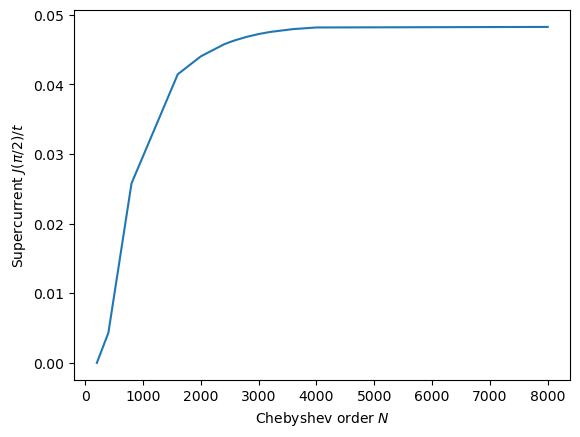

In [22]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

m = Δ0/2
# m = 0

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            if AM(i):
                H[i, i] = -μ * σ0 - m * σ3
            else:
                H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds():
        if inside(i) and inside(j):
            H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2000, 2400, 2500, 2600, 2800, 3000, 3200, 3600, 4000, 8000]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

In [23]:

.

SyntaxError: invalid syntax (<ipython-input-23-582011252461>, line 1)

In [24]:



for (N, J) in zip(Ns, Js):
    print(N, J/Js[-1])

200 1.1362428190632513e-05
400 0.08965337277892929
800 0.5343031991020734
1600 0.8591181482224224
2000 0.912547832559189
2400 0.9482031552931951
2500 0.954829864564596
2600 0.9607527143785003
2800 0.970800634088723
3000 0.9788172333948265
3200 0.985089688703212
3600 0.9935898792990415
4000 0.9983660503980218
8000 1.0


In [25]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

m = Δ0/2

system = Hamiltonian(lattice)
with system as (H, Δ, V):
    for i in lattice.sites():
        if inside(i):
            H[i, i] = -μ * σ0

            if SC1(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
            if SC2(i):
                Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
    for i, j in lattice.bonds(axis=0):
        if inside(i) and inside(j):
            if AM(i) and AM(j):
                H[i, j] = -t * σ0 - m * σ3
            else:
                H[i, j] = -t * σ0
    for i, j in lattice.bonds(axis=1):
        if inside(i) and inside(j):
            if AM(i) and AM(j):
                H[i, j] = -t * σ0 + m * σ3
            else:
                H[i, j] = -t * σ0
        
Ns = []
Js = []
for N in tqdm([200, 400, 800, 1600, 2400, 2500]):
    Ns.append(N)
    Js.append(current(system, N, T))
    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ns, Js)
plt.xlabel(r"Chebyshev order $N$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

 17%|█▋        | 1/6 [00:10<00:51, 10.39s/it]

J(N = 200)/t = 5.938958912939508e-07


 33%|███▎      | 2/6 [00:31<01:07, 16.96s/it]

J(N = 400)/t = 0.003853463625098578


 50%|█████     | 3/6 [01:16<01:29, 29.76s/it]

J(N = 800)/t = 0.021861870082549716


 67%|██████▋   | 4/6 [02:48<01:48, 54.01s/it]

J(N = 1600)/t = 0.05213810197412607


 83%|████████▎ | 5/6 [05:04<01:23, 83.62s/it]

J(N = 2400)/t = 0.06679183835601303


 83%|████████▎ | 5/6 [06:36<01:19, 79.30s/it]


KeyboardInterrupt: 

  0%|          | 0/4 [00:00<?, ?it/s]

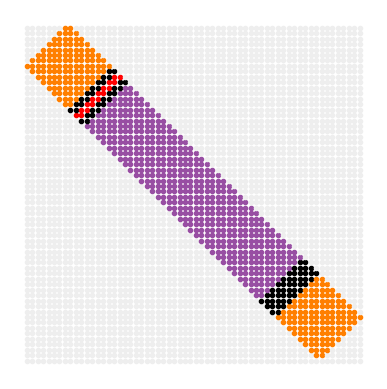

 25%|██▌       | 1/4 [01:03<03:11, 63.94s/it]

J(N = 2500)/t = 0.03065184897505119


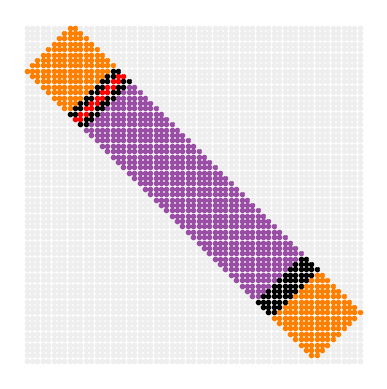

 25%|██▌       | 1/4 [02:10<06:32, 130.70s/it]


KeyboardInterrupt: 

In [26]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 1000
# N = 2500

Ls = []
Js = []
for L_Y in trange(8, 12):
# for L_Y in trange(8, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T))

    print(f"J(N = {Ns[-1]})/t = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

  0%|          | 0/4 [00:00<?, ?it/s]

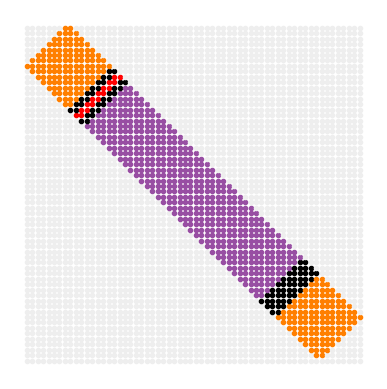

 25%|██▌       | 1/4 [00:42<02:06, 42.01s/it]

J(Ly = 8)/(L_Y * t) = 0.0015804778880313868


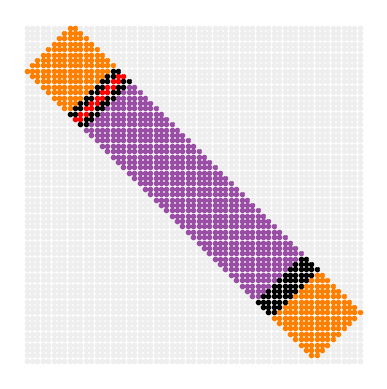

 25%|██▌       | 1/4 [01:12<03:37, 72.45s/it]


KeyboardInterrupt: 

In [27]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 600
# N = 2500

Ls = []
Js = []
for L_Y in trange(8, 12):
# for L_Y in trange(8, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T))

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]/L_Y}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

  0%|          | 0/4 [00:00<?, ?it/s]

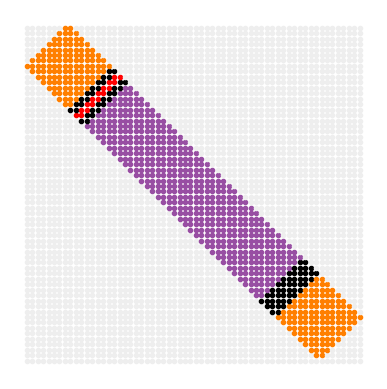

  0%|          | 0/4 [00:17<?, ?it/s]


KeyboardInterrupt: 

In [28]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 600
# N = 2500

Ls = []
Js = []
for L_Y in trange(8, 12):
# for L_Y in trange(8, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/t$")

  0%|          | 0/4 [00:01<?, ?it/s]


KeyboardInterrupt: 

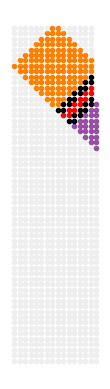

In [29]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 600
# N = 2500

Ls = []
Js = []
for L_Y in trange(8, 12):
# for L_Y in trange(8, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

  0%|          | 0/2 [00:00<?, ?it/s]

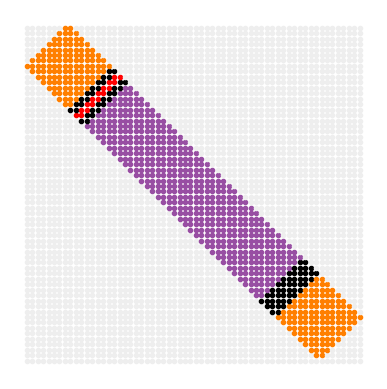

 50%|█████     | 1/2 [00:42<00:42, 42.35s/it]

J(Ly = 8)/(L_Y * t) = 0.0015804778880313868


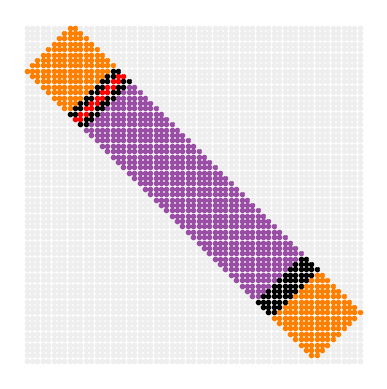

100%|██████████| 2/2 [01:32<00:00, 46.14s/it]

J(Ly = 9)/(L_Y * t) = 0.001530430890878701


Text(0, 0.5, 'Supercurrent $J(π/2)/L_y t$')

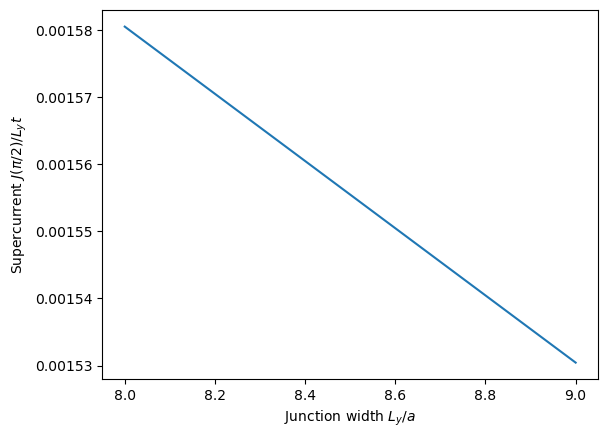

In [30]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 600
# N = 2500

Ls = []
Js = []
for L_Y in trange(8, 10):
# for L_Y in trange(8, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

  0%|          | 0/56 [00:00<?, ?it/s]

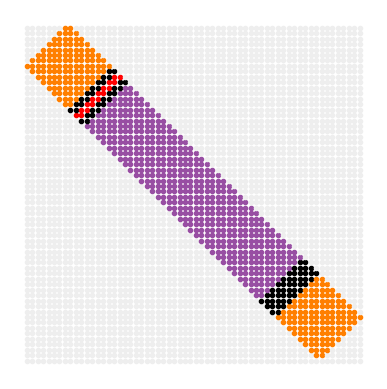

  0%|          | 0/56 [00:32<?, ?it/s]


KeyboardInterrupt: 

In [31]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 2500

Ls = []
Js = []
for L_Y in trange(8, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

In [ ]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 2500

Ls = []
Js = []
for L_Y in trange(1, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

: 

  0%|          | 0/63 [00:00<?, ?it/s]

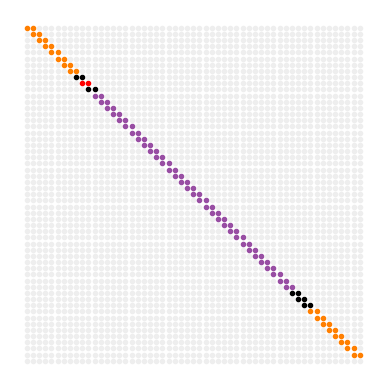

















































  0%|          | 0/63 [00:22<?, ?it/s]


KeyboardInterrupt: 

In [32]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 2500

Ls = []
Js = []
for L_Y in trange(1, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

  0%|          | 0/62 [00:00<?, ?it/s]

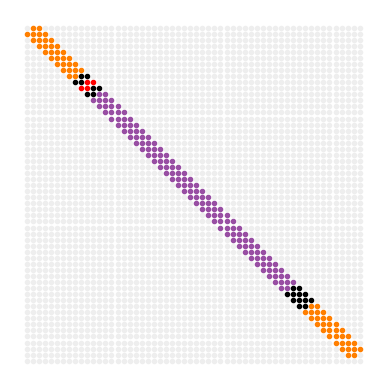

In [33]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 2500

Ls = []
Js = []
for L_Y in trange(2, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from bodge import *


Bad key "text.kerning_factor" on line 4 in
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
DIAG: bool  # Diagonal [110] vs. straight [100] junctions

L_SC: int  # Superconductor length
L_NM: int  # Normal-metal length
L_AM: int  # Altermagnet length

L_X: int  # Total length along the junction direction [X]
L_Y: int  # Total length in the transverse direction [Y]
L_Z: int = 1  # We consider only 2D lattices here

In [3]:
# These functions transform lattice coordinates i = (i_x, i_y, 0) to
# junction coordinates x_i and y_i along either [100] or [110] systems.
def x(i):
    """Junction coordinate along the junction axis."""
    if not DIAG:
        return i[0]
    else:
        return (i[0] + (L_X - i[1]))//2

def y(i):
    """Junction coordinate in the transverse direction."""
    if not DIAG:
        return i[1]
    else:
        return (i[0] - (L_X - i[1]))//2

# Check if a coordinate i is within the junction or not. Useful
# for diagonal systems where we need a larger lattice than junction.
def inside(i):
    return x(i) >= 0 and x(i) < L_X and y(i) >= 0 and y(i) < L_Y

In [4]:
# These functions are used to check whether a specific lattice site i
# corresponds to a specific material. Nice for Hamiltonian construction.
def SC1(i):
    """Left superconductor."""
    return x(i) < L_SC
    
def SC2(i):
    """Right superconductor."""
    return x(i) >= L_X - L_SC

def NM1(i):
    """Left normal spacer."""
    return x(i) < L_SC + L_NM and not SC1(i)

def NM2(i):
    """Right normal spacer."""
    return x(i) >= L_X - L_SC - L_NM and not SC2(i)

def OBS(i):
    """Current observation region."""
    return x(i) == L_SC + L_NM//2

def AM(i):
    """Altermagnetic interlayer."""
    return not SC1(i) and not SC2(i) and not NM1(i) and not NM2(i)

In [5]:
# These routines are used to construct and visualize the relevant lattice types.
lattice: CubicLattice
def create_lattice():
    if DIAG:
        return CubicLattice((L_X + L_Y, L_X + L_Y, 1))
    else:
        return CubicLattice((L_X, L_Y, 1))

def visualize():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    marker="."

    for i in lattice.sites():
        if not inside(i):
            ax.scatter(x=i[0], y=i[1], color='#eeeeee', marker=marker)
        elif OBS(i):
            ax.scatter(x=i[0], y=i[1], color='#ff0000', marker=marker)
        elif SC1(i) or SC2(i):
            ax.scatter(x=i[0], y=i[1], color='#ff7f00', marker=marker)
        elif NM1(i) or NM2(i):
            ax.scatter(x=i[0], y=i[1], color='k', marker=marker)
        elif AM(i):
            ax.scatter(x=i[0], y=i[1], color='#984ea3', marker=marker)
    plt.show()

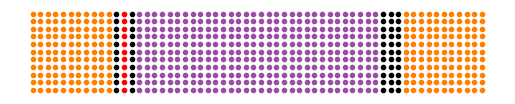

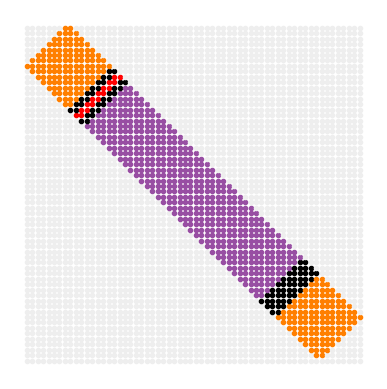

In [6]:
L_NM = 3
L_AM = 32

DIAG = False

L_SC = 11
L_Y = 11
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

DIAG = True

L_SC = 8
L_Y = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM

lattice = create_lattice()
visualize()

In [7]:
def current(system, N=1000, T=1e-3):
    F = FermiMatrix(system, N)(T)
    Jx = F.current_elec(axis=0)
    Jy = F.current_elec(axis=1)

    J = 0.0
    for i in lattice.sites():
        if OBS(i):
            if DIAG:
                # Current in 45º direction.
                J += (Jx[i] - Jy[i])/np.sqrt(2)
            else:
                # Current in 0º direction.
                J += Jx[i]

    return J

  0%|          | 0/62 [00:00<?, ?it/s]

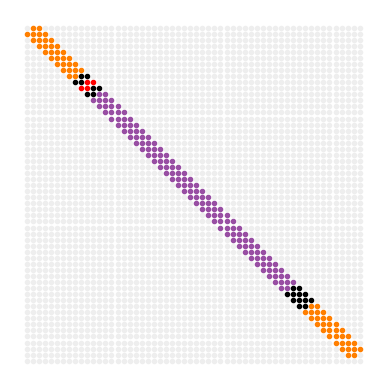

  0%|          | 0/62 [00:07<?, ?it/s]


NameError: name 'μ' is not defined

In [8]:
DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 2500

Ls = []
Js = []
for L_Y in trange(2, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")

  0%|          | 0/62 [00:00<?, ?it/s]

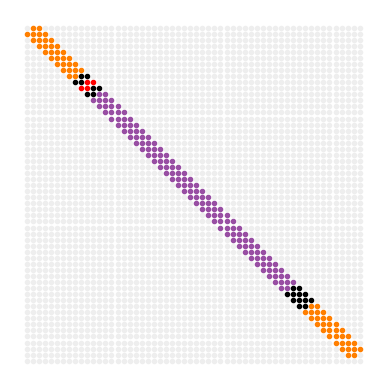

  2%|▏         | 1/62 [00:36<37:11, 36.58s/it]

J(Ly = 2)/(L_Y * t) = 0.013212484556275151


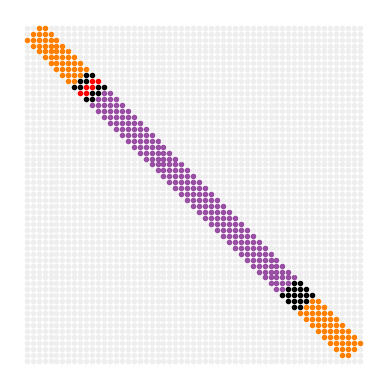

  3%|▎         | 2/62 [01:20<40:46, 40.78s/it]

J(Ly = 3)/(L_Y * t) = 0.006152739395340508


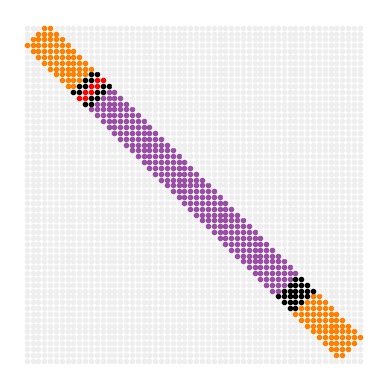

  5%|▍         | 3/62 [02:15<46:34, 47.36s/it]

J(Ly = 4)/(L_Y * t) = 0.00881444957846406


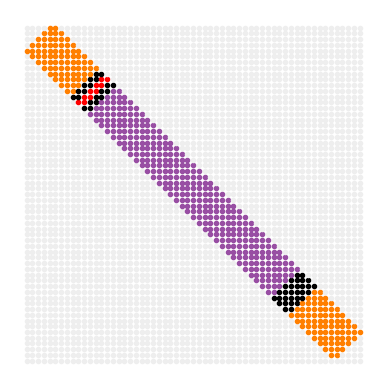

  6%|▋         | 4/62 [03:27<55:10, 57.07s/it]

J(Ly = 5)/(L_Y * t) = 0.009803829216255808


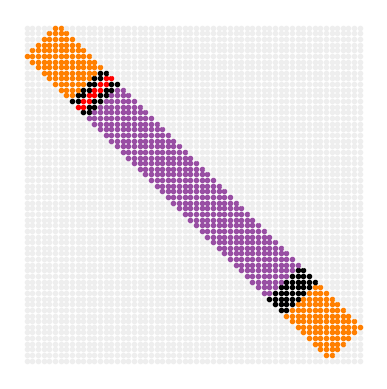

  8%|▊         | 5/62 [05:00<1:06:33, 70.06s/it]

J(Ly = 6)/(L_Y * t) = 0.008875622336814557


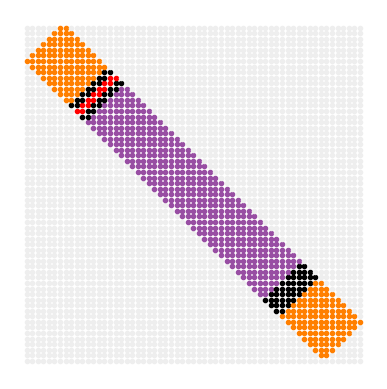

 10%|▉         | 6/62 [06:57<1:20:18, 86.04s/it]

J(Ly = 7)/(L_Y * t) = 0.007541862671850653


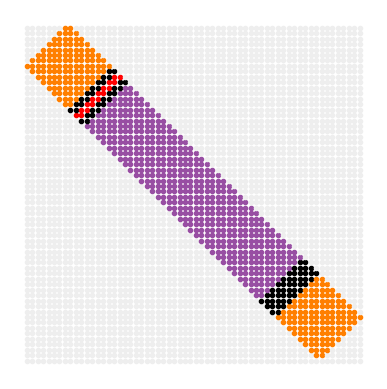

 11%|█▏        | 7/62 [09:23<1:36:57, 105.76s/it]

J(Ly = 8)/(L_Y * t) = 0.008494138216113197


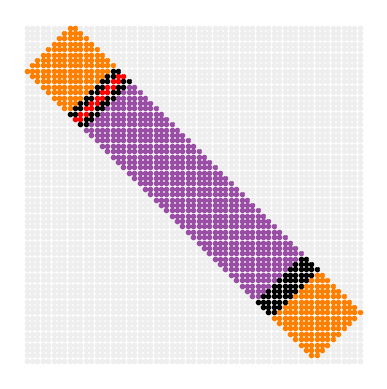

 13%|█▎        | 8/62 [12:23<1:56:23, 129.32s/it]

J(Ly = 9)/(L_Y * t) = 0.006657404712121472


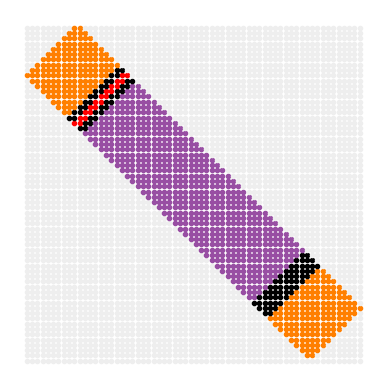

 15%|█▍        | 9/62 [16:03<2:19:05, 157.46s/it]

J(Ly = 10)/(L_Y * t) = 0.0073259836789657


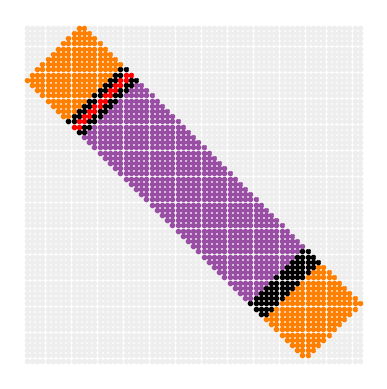

 16%|█▌        | 10/62 [20:24<2:44:18, 189.59s/it]

J(Ly = 11)/(L_Y * t) = 0.006942625044096763


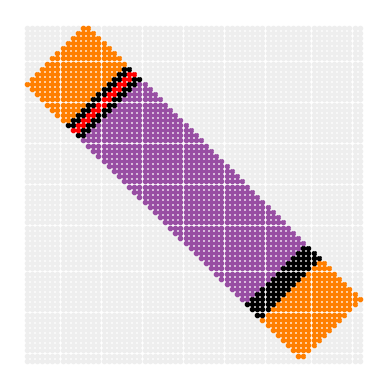

 18%|█▊        | 11/62 [25:31<3:11:36, 225.42s/it]

J(Ly = 12)/(L_Y * t) = 0.007104491257595852


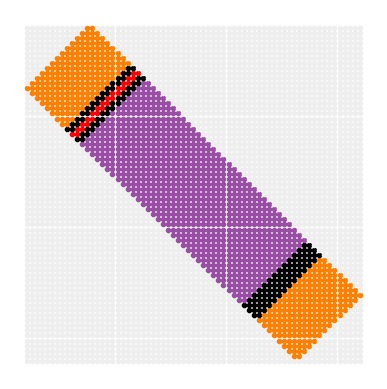

 19%|█▉        | 12/62 [31:28<3:41:22, 265.65s/it]

J(Ly = 13)/(L_Y * t) = 0.005386848120997172


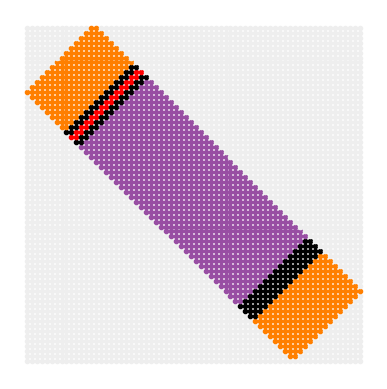

 21%|██        | 13/62 [38:22<4:13:31, 310.45s/it]

J(Ly = 14)/(L_Y * t) = 0.005483902463603298


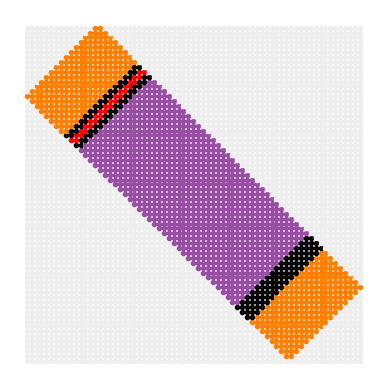

 23%|██▎       | 14/62 [46:13<4:47:10, 358.97s/it]

J(Ly = 15)/(L_Y * t) = 0.005247409819983682


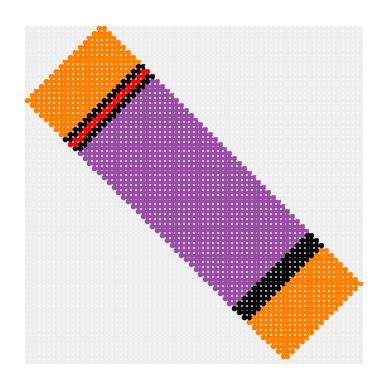

 24%|██▍       | 15/62 [55:09<5:23:02, 412.40s/it]

J(Ly = 16)/(L_Y * t) = 0.005367413147785509


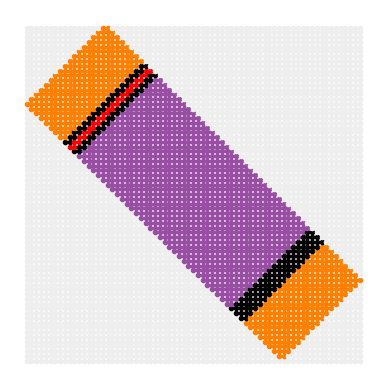

 26%|██▌       | 16/62 [1:05:12<6:00:00, 469.58s/it]

J(Ly = 17)/(L_Y * t) = 0.005139568480856231


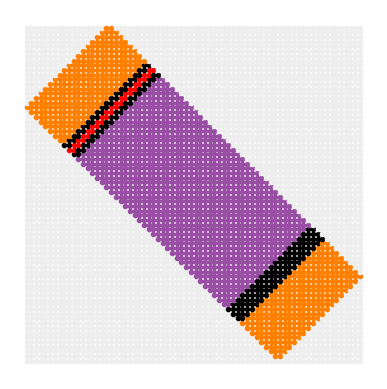

 27%|██▋       | 17/62 [1:16:20<6:37:05, 529.45s/it]

J(Ly = 18)/(L_Y * t) = 0.0049884505835727355


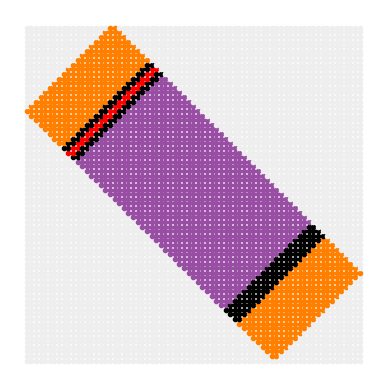

 29%|██▉       | 18/62 [1:28:42<7:14:57, 593.12s/it]

J(Ly = 19)/(L_Y * t) = 0.004963484488267173


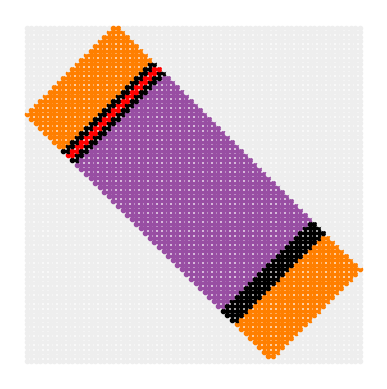

kpm:   0%|          | 0/457 [00:00<?, ?blk/s]

In [9]:
t = 1.0
Δ0 = 0.03 * t
μ = -0.5 * t
δφ = π/2

Tc = (Δ0 / 1.764)
T = 0.1 * Tc

m = Δ0/2

DIAG = True
L_SC = 8
L_X = 2 * L_SC + 2 * L_NM + L_AM
N = 2500

Ls = []
Js = []
for L_Y in trange(2, 64):
    lattice = create_lattice()
    visualize()

    system = Hamiltonian(lattice)
    with system as (H, Δ, V):
        for i in lattice.sites():
            if inside(i):
                H[i, i] = -μ * σ0

                if SC1(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((-1j/2) * δφ)
                if SC2(i):
                    Δ[i, i] = Δ0 * jσ2 * np.exp((+1j/2) * δφ)
        for i, j in lattice.bonds(axis=0):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 - m * σ3
                else:
                    H[i, j] = -t * σ0
        for i, j in lattice.bonds(axis=1):
            if inside(i) and inside(j):
                if AM(i) and AM(j):
                    H[i, j] = -t * σ0 + m * σ3
                else:
                    H[i, j] = -t * σ0

    Ls.append(L_Y)
    Js.append(current(system, N, T) / L_Y)

    print(f"J(Ly = {L_Y})/(L_Y * t) = {Js[-1]}")

plt.plot(Ls, Js)
plt.xlabel(r"Junction width $L_y/a$")
plt.ylabel(r"Supercurrent $J(π/2)/L_y t$")